In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [6]:
categorical_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(exclude=['object']).columns
categorical_data, numerical_data

(Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['laptop_ID', 'Inches', 'Price_euros'], dtype='object'))

In [7]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [8]:
print(df['Inches'].value_counts())
print(df['Inches'].value_counts().count())

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
18


In [9]:
for col in categorical_data:
  print(f'{col}: {df[col].value_counts()} and count is {df[col].value_counts().count()}')
  print("----------------------------")

Company: Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64 and count is 19
----------------------------
Product: Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64 and count is 618
----------

In [10]:
for col in categorical_data:
  print(f'{col}: count is {df[col].value_counts().count()}')

Company: count is 19
Product: count is 618
TypeName: count is 6
ScreenResolution: count is 40
Cpu: count is 118
Ram: count is 9
Memory: count is 39
Gpu: count is 110
OpSys: count is 9
Weight: count is 179


### Data Visulaization

<Axes: xlabel='Inches', ylabel='Price_euros'>

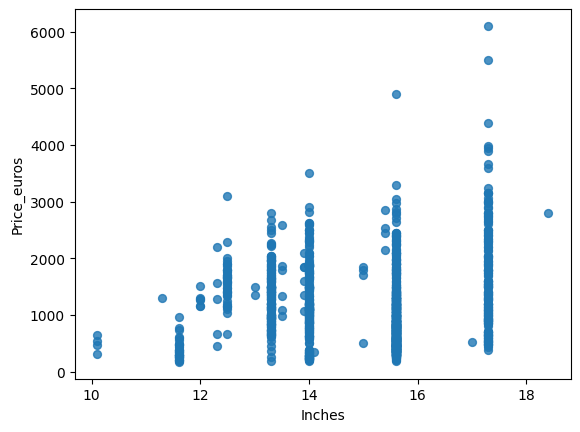

In [15]:
df2.plot(kind='scatter', x='Inches', y='Price_euros', s=32, alpha=.8)

<Axes: title={'center': 'Price_euros'}, ylabel='Frequency'>

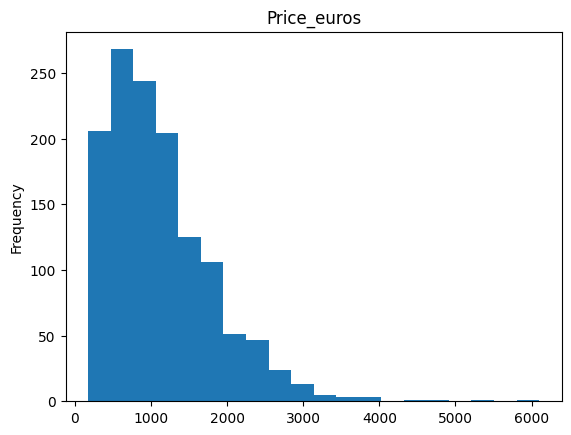

In [16]:
df2['Price_euros'].plot(kind='hist', bins=20, title='Price_euros')

<Axes: ylabel='TypeName'>

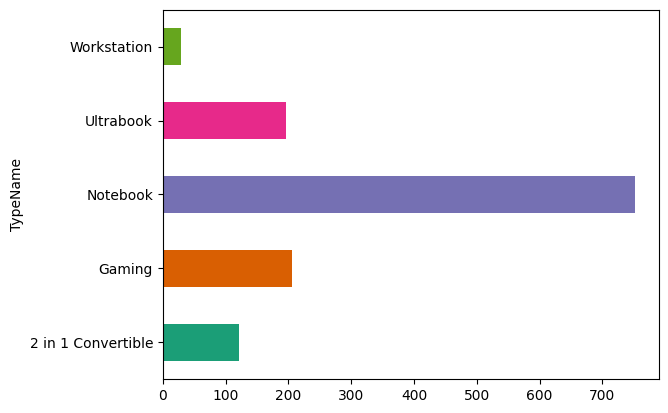

In [17]:
df2.groupby('TypeName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: title={'center': 'Inches'}, ylabel='Frequency'>

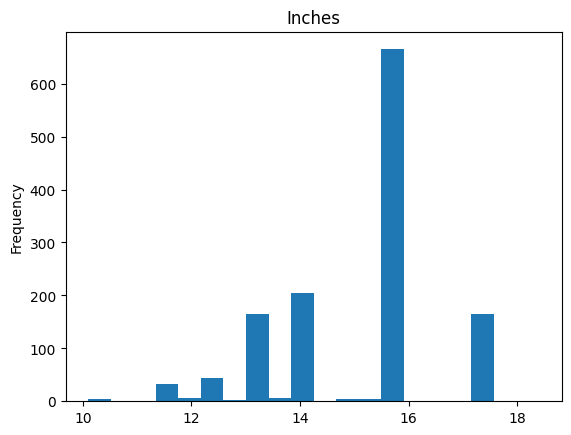

In [18]:
df2['Inches'].plot(kind='hist', bins=20, title='Inches')

<Axes: xlabel='TypeName', ylabel='Price_euros'>

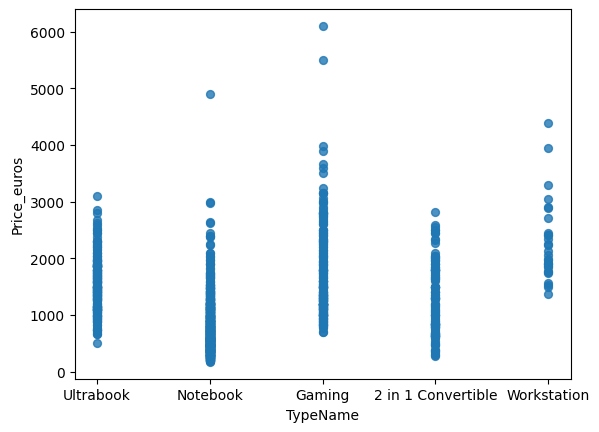

In [19]:
df2.plot(kind='scatter', x='TypeName', y='Price_euros', s=32, alpha=.8)

<Axes: >

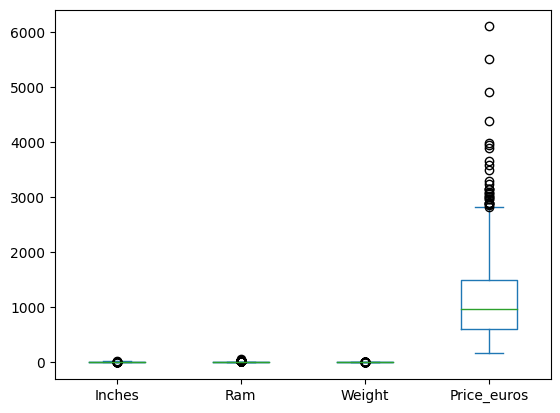

In [20]:
df2.plot.box()

### Data preprocessing

In [11]:
df2 = df.copy()
df2.drop(['Product', 'OpSys', 'laptop_ID'], axis=1, inplace=True)
df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,1.3kg,1499.00
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,229.00
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,764.00


In [12]:
df2['Weight'] = df2['Weight'].str.replace('kg', '').astype(float)
df2['Weight']

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.80
1299,1.30
1300,1.50
1301,2.19


In [13]:
df2['Ram'] = df2['Ram'].str.replace('GB', '').astype(float)
df2['Ram']

,Ram
0,8.0
1,8.0
2,8.0
3,16.0
4,8.0
...,...
1298,4.0
1299,16.0
1300,2.0
1301,6.0


In [14]:
df2['TypeName'] = df2['TypeName'].replace('Netbook', 'Notebook')
df2['TypeName'].value_counts()

,count
TypeName,
Notebook,752
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29


In [21]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df2['Inches'] = scaler.fit_transform(df2[['Inches']])
df2['Weight'] = scaler.fit_transform(df2[['Weight']])
df2[['Inches' , 'Weight']].describe()

,Inches,Weight
count,1303.000000,1303.000000
mean,-0.364256,-0.001583
std,0.891440,0.831843
min,-3.437500,-1.687500
25%,-1.000000,-0.675000
50%,0.000000,0.000000
75%,0.000000,0.325000
max,1.750000,3.325000


In [23]:
df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros
0,Apple,Ultrabook,-1.4375,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,-0.8375,1339.69
1,Apple,Ultrabook,-1.4375,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,-0.8750,898.94
2,HP,Notebook,0.0000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,-0.2250,575.00
3,Apple,Ultrabook,-0.1250,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,-0.2625,2537.45
4,Apple,Ultrabook,-1.4375,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,-0.8375,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,-1.0000,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,-0.3000,638.00
1299,Lenovo,2 in 1 Convertible,-1.4375,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,-0.9250,1499.00
1300,Lenovo,Notebook,-1.0000,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,-0.6750,229.00
1301,HP,Notebook,0.0000,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,0.1875,764.00


In [24]:
df2 = pd.get_dummies(df2, columns=['Company', 'TypeName'])
df2

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,Company_Acer,Company_Apple,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,-1.4375,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,-0.8375,1339.69,False,True,...,False,False,False,False,False,False,False,False,True,False
1,-1.4375,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,-0.8750,898.94,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0.0000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,-0.2250,575.00,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.1250,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,-0.2625,2537.45,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-1.4375,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,-0.8375,1803.60,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-1.0000,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,-0.3000,638.00,False,False,...,False,False,False,False,False,True,False,False,False,False
1299,-1.4375,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,-0.9250,1499.00,False,False,...,False,False,False,False,False,True,False,False,False,False
1300,-1.0000,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,-0.6750,229.00,False,False,...,False,False,False,False,False,False,False,True,False,False
1301,0.0000,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,0.1875,764.00,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
le = preprocessing.LabelEncoder()
df2['ScreenResolution'] = le.fit_transform(df2['ScreenResolution'])
df2['Cpu'] = le.fit_transform(df2['Cpu'])
df2['Gpu'] = le.fit_transform(df2['Gpu'])
df2['Memory'] = le.fit_transform(df2['Memory'])
df2

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,Company_Acer,Company_Apple,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,-1.4375,23,65,8.0,4,58,-0.8375,1339.69,False,True,...,False,False,False,False,False,False,False,False,True,False
1,-1.4375,1,63,8.0,2,51,-0.8750,898.94,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0.0000,8,74,8.0,16,53,-0.2250,575.00,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.1250,25,85,16.0,29,9,-0.2625,2537.45,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-1.4375,23,67,8.0,16,59,-0.8375,1803.60,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-1.0000,13,89,4.0,4,47,-0.3000,638.00,False,False,...,False,False,False,False,False,True,False,False,False,False
1299,-1.4375,19,89,16.0,29,47,-0.9250,1499.00,False,False,...,False,False,False,False,False,True,False,False,False,False
1300,-1.0000,0,34,2.0,35,40,-0.6750,229.00,False,False,...,False,False,False,False,False,False,False,True,False,False
1301,0.0000,0,89,6.0,10,21,0.1875,764.00,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
df2.corr()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,Company_Acer,Company_Apple,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
Inches,1.000000,-0.247841,0.153041,0.237993,-0.193382,0.215710,0.827631,0.068197,0.009435,-0.158850,...,-0.025923,-0.069898,-0.090946,-0.046401,-0.022075,-0.314691,0.402666,0.161014,-0.417950,0.098893
ScreenResolution,-0.247841,1.000000,0.232751,0.238280,0.059042,0.160816,-0.135653,0.331327,-0.094939,0.139409,...,0.017891,-0.000020,-0.029338,-0.019178,0.040664,0.302560,0.088797,-0.434502,0.257956,0.015512
Cpu,0.153041,0.232751,1.000000,0.468942,-0.013264,0.490761,0.189229,0.529334,-0.149257,-0.068414,...,0.065924,0.044581,0.002876,-0.099132,0.012707,0.061110,0.290399,-0.381202,0.130286,0.123855
Ram,0.237993,0.238280,0.468942,1.000000,0.151801,0.393280,0.383874,0.743007,-0.138432,0.023950,...,0.159724,0.037484,0.010946,-0.053302,0.017663,0.017560,0.481728,-0.447287,0.087470,0.062353
Memory,-0.193382,0.059042,-0.013264,0.151801,1.000000,-0.020784,-0.167431,0.185680,-0.057765,0.027216,...,0.037487,-0.018646,0.035334,0.046129,-0.002394,0.146399,-0.110796,-0.127249,0.139536,0.073428
Gpu,0.215710,0.160816,0.490761,0.393280,-0.020784,1.000000,0.336199,0.443299,0.030231,-0.045771,...,0.057425,-0.019781,-0.025777,-0.032559,0.094521,-0.024412,0.473738,-0.380138,-0.038708,0.245558
Weight,0.827631,-0.135653,0.189229,0.383874,-0.167431,0.336199,1.000000,0.210370,0.056444,-0.138191,...,0.017343,-0.090664,-0.117163,-0.059121,-0.034930,-0.236693,0.591756,-0.007701,-0.439952,0.097031
Price_euros,0.068197,0.331327,0.529334,0.743007,0.185680,0.443299,0.210370,1.000000,-0.208349,0.080688,...,0.233756,0.034584,0.040339,-0.071972,0.000776,0.072675,0.375789,-0.579250,0.255658,0.249752
Company_Acer,0.009435,-0.094939,-0.149257,-0.138432,-0.057765,0.030231,0.056444,-0.208349,1.000000,-0.037497,...,-0.021532,-0.024433,-0.057296,-0.016257,-0.016257,-0.015336,-0.064096,0.135627,-0.091450,-0.044202
Company_Apple,-0.158850,0.139409,-0.068414,0.023950,0.027216,-0.045771,-0.138191,0.080688,-0.037497,1.000000,...,-0.009406,-0.010674,-0.025030,-0.007102,-0.007102,-0.040950,-0.055302,-0.149520,0.304167,-0.019310


# Model applying on data

In [27]:
X = df2.drop(['Price_euros'], axis = 1)
y = df2['Price_euros']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1097)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1042, 31) (261, 31) (1042,) (261,)


In [55]:
Linear_model = LinearRegression()

In [56]:
model = Linear_model.fit(x_train, y_train)

In [57]:
y_pred = model.predict(x_test)
r2 = r2_score(y_pred,y_test)
r2

0.7442115962595395